In [16]:
import pandas as pd
import numpy as np

In [70]:
df = pd.read_csv('train.csv', usecols=['Parch','SibSp','Fare','Survived'])
df['Family'] = df['Parch']+df['SibSp']
df.drop(columns=['Parch','SibSp'],inplace=True)
df = df[['Fare','Family','Survived']]
df.head()

,Fare,Family,Survived
0,7.2500,1,0
1,71.2833,1,1
2,7.9250,0,1
3,53.1000,1,1
4,8.0500,0,0


In [73]:
import plotly.express as px

fig = px.scatter_3d(df,x="Fare",y="Family",z="Survived")
fig.show()

In [74]:
X = df.drop(columns='Survived')
y = df['Survived']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [76]:
X_train.head()

,Fare,Family
451,19.9667,1
345,13.0000,0
687,10.1708,0
279,20.2500,2
742,262.3750,4


In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr')

In [78]:
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [79]:
y_pred = lr.predict(X_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78       160
           1       0.83      0.23      0.36       108

    accuracy                           0.67       268
   macro avg       0.74      0.60      0.57       268
weighted avg       0.72      0.67      0.61       268



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



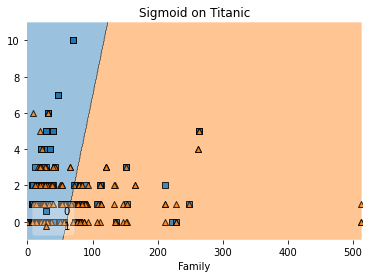

In [81]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


plot_decision_regions(X=X.values, y=y.values, clf=lr, legend=3)

# Adding axes annotations
plt.xlabel('Fare')
plt.xlabel('Family')
plt.title('Sigmoid on Titanic')

plt.show()